##### READING DATA

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

podaci=pd.read_excel('C:\\Users\\Dunja Computers\\Documents\\NEBOJŠA\\Interkonekcija\\VOLI 10\\53217697.xlsx',sheet_name='AdvanceData',index_col=0)
# podaci.columns
podaci.rename(columns={'194000410_LP1: A+01':'energija [kWh]'},inplace=True)
data_Bar=pd.DataFrame(index=podaci.index)
data_Bar['VOLI10_energija_[kWh]'] = podaci['energija [kWh]']
data_Bar.head()

,VOLI10_energija_[kWh]
Time,
2023-01-01 00:15:00,0.00150
2023-01-01 00:30:00,0.00175
2023-01-01 00:45:00,0.00175
2023-01-01 01:00:00,0.00150
2023-01-01 01:15:00,0.00125


##### PLOT

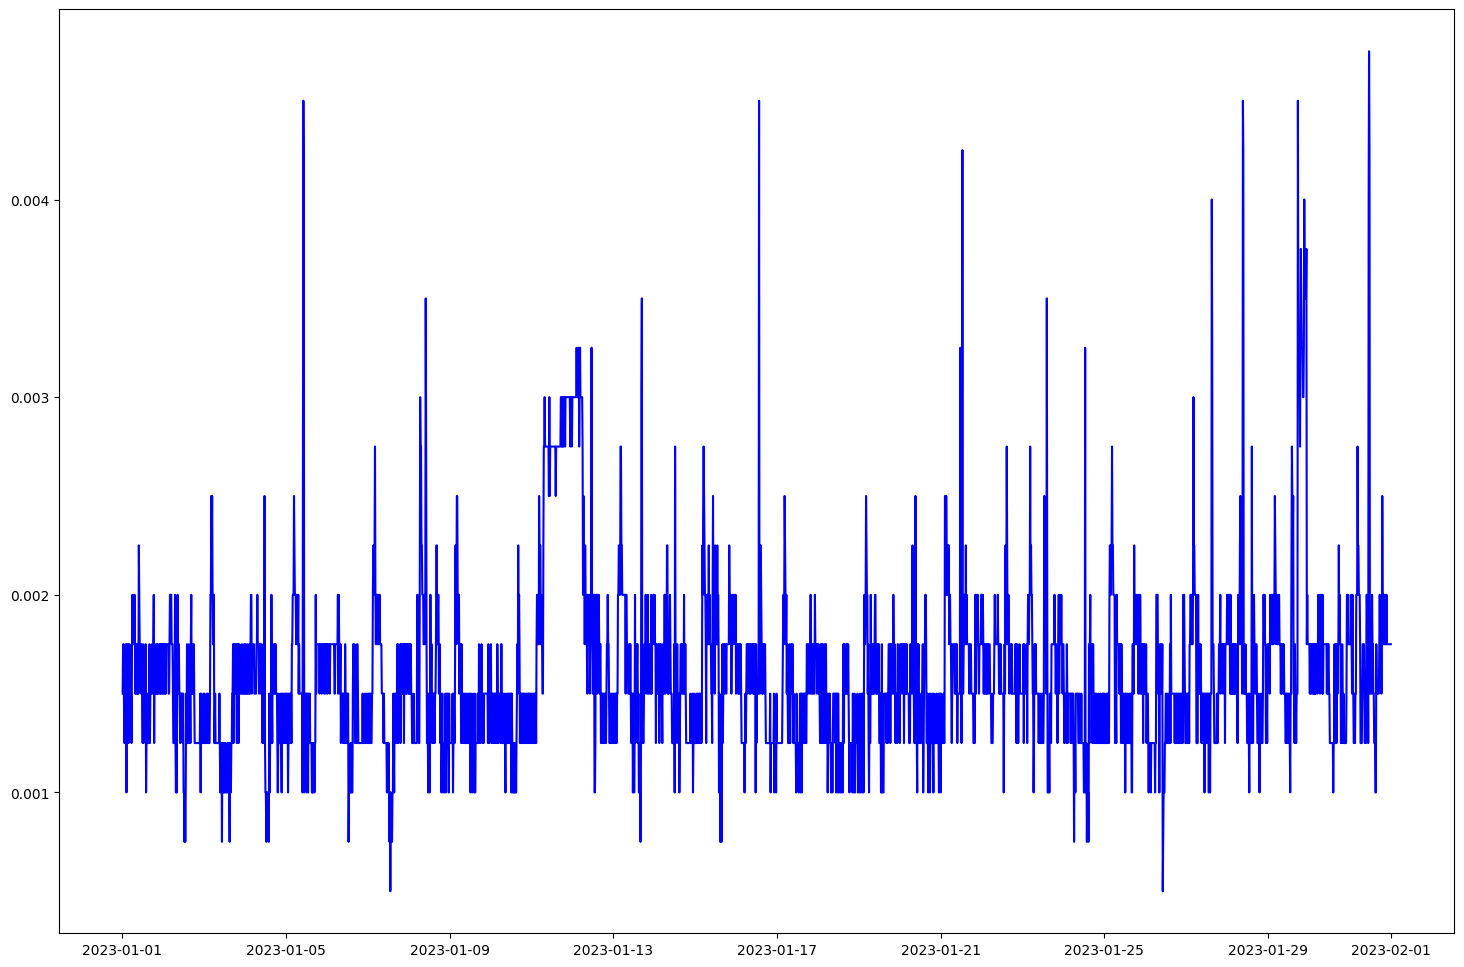

In [30]:
%matplotlib inline
import datetime
from pandas.plotting import register_matplotlib_converters
fig, (ax1) = plt.subplots(1,1)
fig.set_size_inches(18, 12)

plt.plot(data_Bar['VOLI10_energija_[kWh]'],'b')


##### EXAMPLE ONE DAY

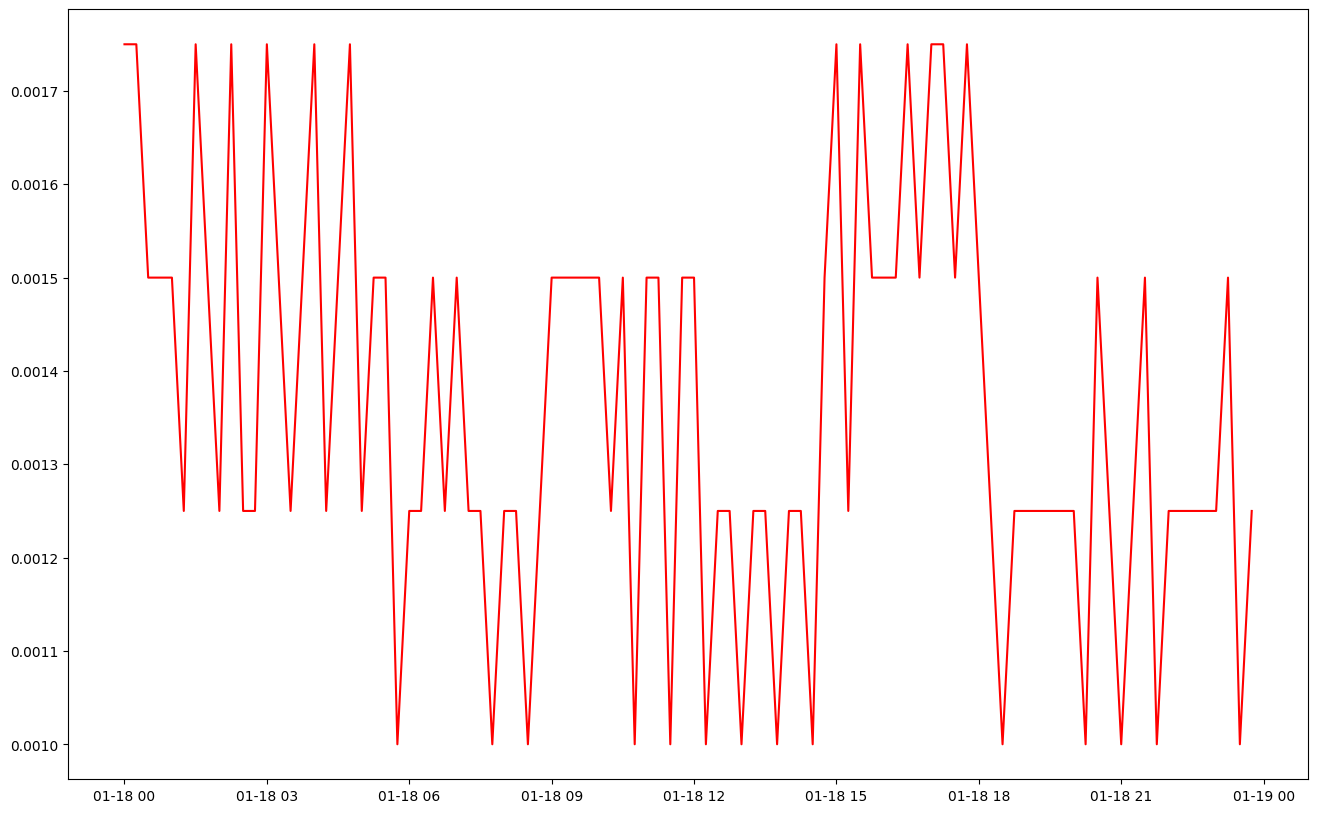

In [31]:
%matplotlib inline
import datetime
from pandas.plotting import register_matplotlib_converters

fig, (ax1) = plt.subplots(1,1)
fig.set_size_inches(16, 10)
plt.plot(data_Bar['VOLI10_energija_[kWh]']['2023-01-18'],'red')

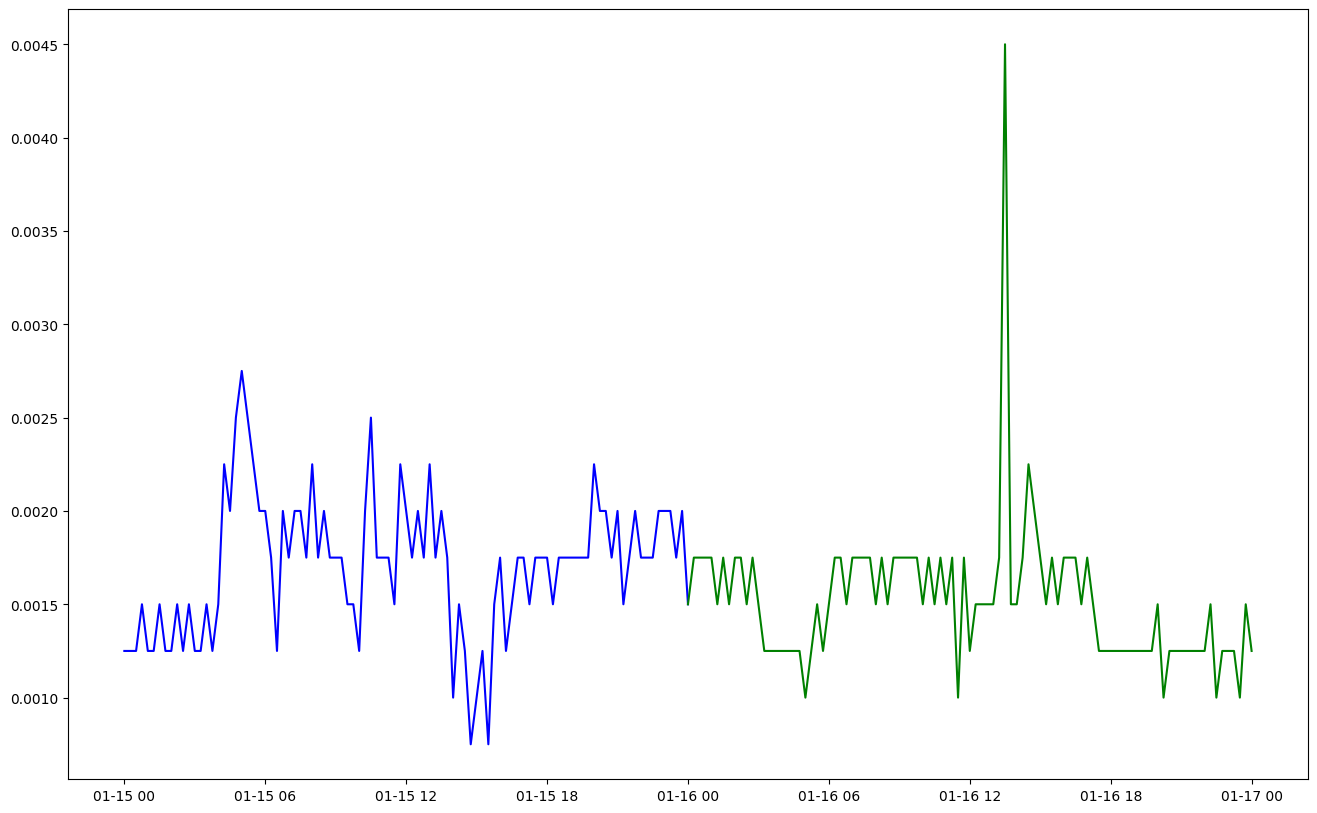

In [32]:
%matplotlib inline
import datetime
from pandas.plotting import register_matplotlib_converters

fig, (ax1) = plt.subplots(1,1)
fig.set_size_inches(16, 10)
plt.plot(data_Bar['VOLI10_energija_[kWh]']['2023-01-15 00:00':'2023-01-16 00:00'],'b')
plt.plot(data_Bar['VOLI10_energija_[kWh]']['2023-01-16 00:00':'2023-01-17 00:00'],'g')
# plt.plot(data_Bar['VOLI10_energija_[kWh]']['2023-01-17 00:00':'2023-01-18 00:00'],'r')
# plt.plot(data_Bar['VOLI10_energija_[kWh]']['2023-01-18 00:00':'2023-01-19 00:00'],'k')
# plt.plot(data_Bar['VOLI10_energija_[kWh]']['2023-01-19 00:00':'2023-01-20 00:00'],'m')
# plt.plot(data_Bar['VOLI10_energija_[kWh]']['2023-01-20 00:00':'2023-01-21 00:00'],'y')
# plt.plot(data_Bar['VOLI10_energija_[kWh]']['2023-01-21 00:00':'2023-01-22 00:00'],'g')
# plt.plot(data_Bar['VOLI10_energija_[kWh]']['2023-01-22 00:00':'2023-01-23 00:00'],'r')

#### MAXIMUM INCREASE FOR EVERY MONTH

In [22]:
# for i in range(1, len(data_Bar)-1):
#     if data_Bar.index[i].month != data_Bar.index[i-1].month:
#         month = data_Bar.index[i-1].strftime('%B %Y')
#         max_increase = data_Bar.iloc[i-1:i, 0].diff().max()
#         print(f"Biggest increase in {month}: {max_increase:.2f} kWh")


#### PEAK SHAVING POTENTIAL

In [58]:
data_Bar['working_hours'] = 0 
data_Bar.loc[(data_Bar.index.hour>8), 'working_hours'] = data_Bar['VOLI10_energija_[kWh]']/1e3
data_Bar.loc[(data_Bar.index.hour>18), 'working_hours'] = 0

df_working_hour_split=data_Bar.between_time('9:00', '15:00')
monthly_capacities=np.zeros(13); average_capacities=np.zeros(13); difference=np.zeros(13); teoretical_power_shaving_potential= np.zeros(13)

j=1 #jer je u podacima dat samo januar 
monthly_capacities[j] = max(df_working_hour_split[(df_working_hour_split.index.month == j)]['VOLI10_energija_[kWh]'])
average_capacities[j] = np.mean(df_working_hour_split[(df_working_hour_split.index.month == j)]['VOLI10_energija_[kWh]'])
difference[j]= monthly_capacities[j] - average_capacities[j]
print('mjesec,     mjesecni kapacitet,      prosjecni kapacitet,        prosj/mjesecni,           razlika')
print('  ',j,'        ','    ',monthly_capacities[j],'         ',average_capacities[j],'   ',average_capacities[j]/monthly_capacities[j],'    ',difference[j])


mjesec,     mjesecni kapacitet,      prosjecni kapacitet,        prosj/mjesecni,           razlika
   1               0.00475           0.0015235483870967741     0.32074702886247874      0.0032264516129032255


In [65]:
capacity_cost = 7.3868 * 1.21
teoretical_power_shaving_potential = capacity_cost * difference
print(teoretical_power_shaving_potential[j])

0.028838114856774188


##### HISTOGRAM ENERGIJE

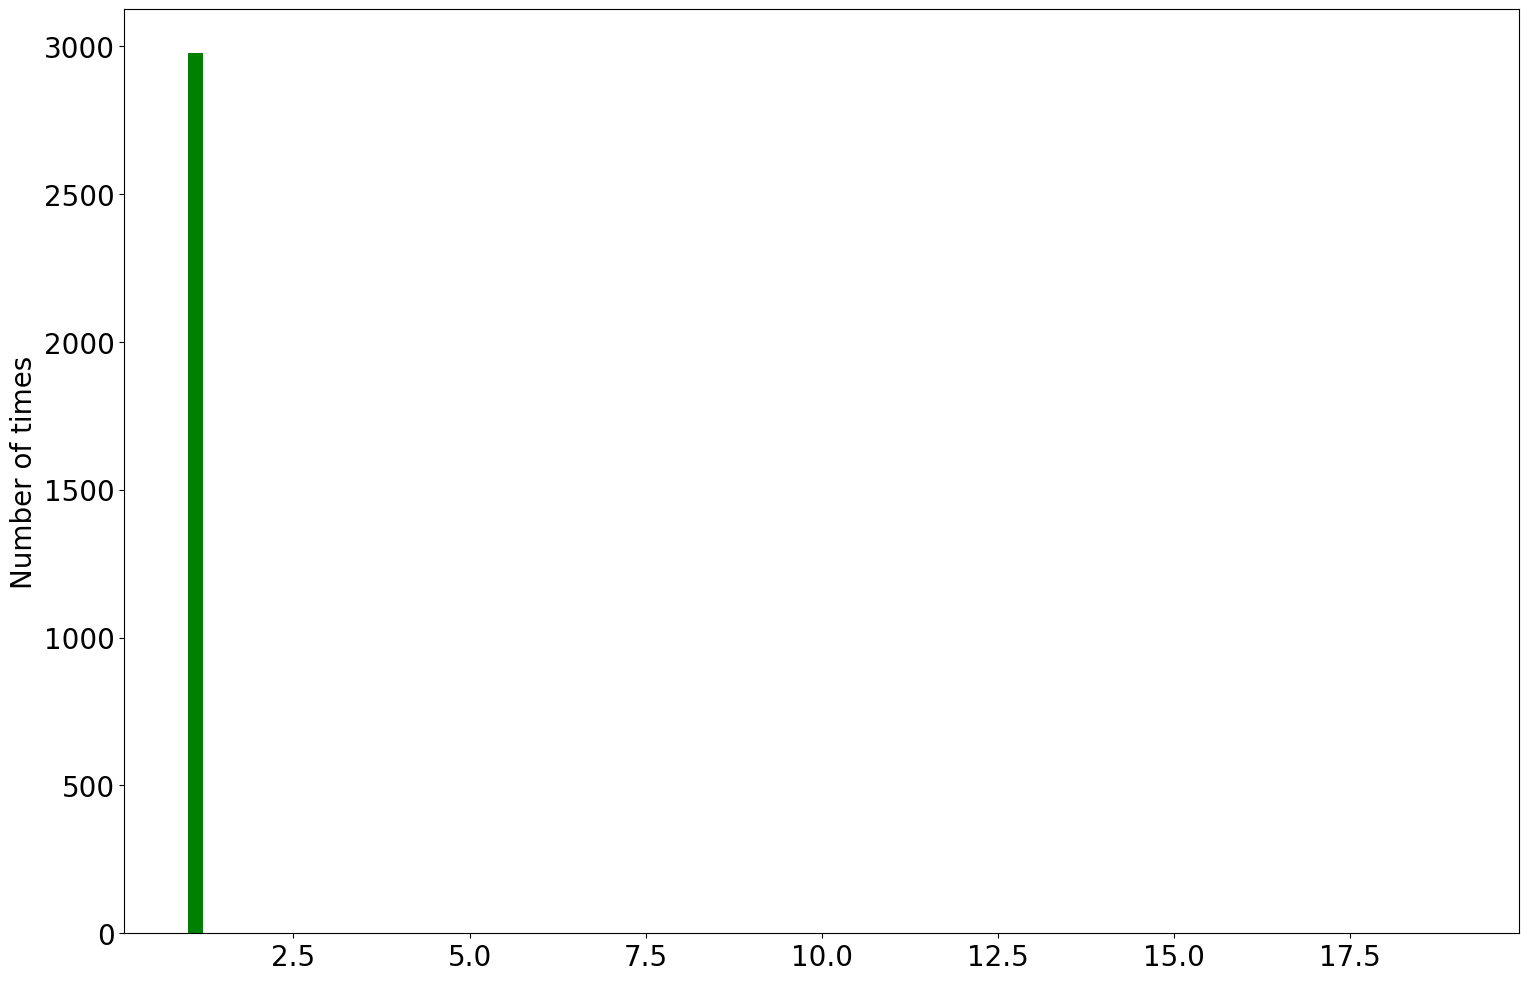

In [63]:
fig, (ax1) = plt.subplots(1,1)
fig.set_size_inches(18, 12)
ax1.hist(data_Bar['VOLI10_energija_[kWh]'],bins=9,range=(0,20),color='green',histtype='bar', rwidth=0.1) 
#xp=[0,100,200,300,400,500,600,700,800,900]
#plt.xticks(xp)
#plt.xticks(xp, ['1','2','3','4'])
plt.ylabel('Number of times',size=20)
ax1.tick_params(axis='both', labelsize=20)

##### OPSTE INFORMACIJE

In [64]:
print(data_Bar.describe())

       VOLI10_energija_[kWh]  working_hours
count            2976.000000   2.976000e+03
mean                0.001606   6.457493e-07
std                 0.000455   8.281738e-07
min                 0.000500   0.000000e+00
25%                 0.001250   0.000000e+00
50%                 0.001500   0.000000e+00
75%                 0.001750   1.500000e-06
max                 0.004750   4.750000e-06
